# Results

In [162]:
import os
import re
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tokenizer import Vocabulary, Tokenizer

In [163]:
data_files = os.listdir('../data')

# get the most recent loss file 
losses = list(filter(lambda x: 'losses' in x, data_files))
losses.sort(key=lambda x: int(re.findall(r'\d+',x)[0]), reverse=True)
# get all of the path files
paths_dir = list(filter(lambda x: 'paths' in x, data_files))

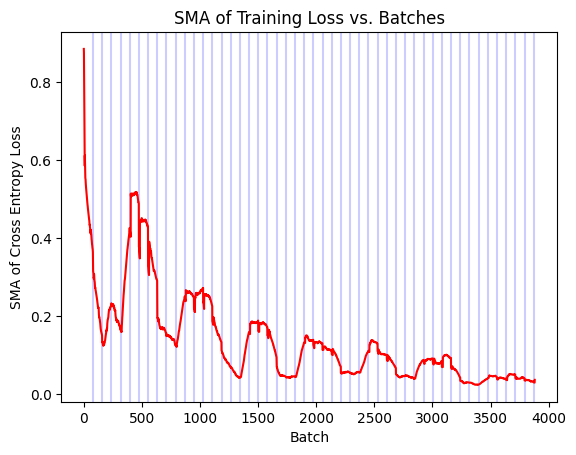

In [164]:
loss_vals = pickle.load(open(f'../data/{losses[0]}', 'rb'))
# plot a moving average with window size = 70
loss_ma = np.convolve(loss_vals, np.ones(70)/70,mode='valid')
for i in range(0,len(loss_vals),79):
    if i != 0:  
        plt.axvline(x=i,color ='b',alpha=0.2)
plt.plot(loss_ma, 'r-')
plt.title('SMA of Training Loss vs. Batches')
plt.ylabel('SMA of Cross Entropy Loss')
plt.xlabel('Batch')
plt.show()

Text(0.5, 0, 'Epoch')

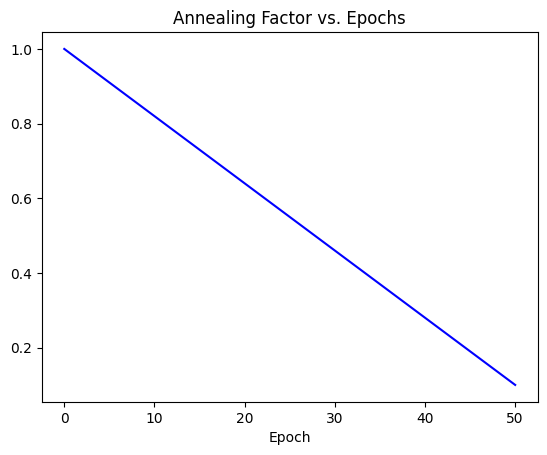

In [165]:
# plot the annealing factor
x = np.linspace(0,50)
y = 1-0.9 * (x/50)
plt.plot(x,y, 'b-')
plt.title('Annealing Factor vs. Epochs')
plt.xlabel('Epoch')

In [166]:
# sample paths
paths = [
    pickle.load(open(f'../data/{v}','rb')) for v in paths_dir
]

In [175]:
vocab = Vocabulary(9)
token = Tokenizer(vocab)

def decode_path(path):
    s = []
    for t in path:
        s.append(vocab.idx2word[int(t)])
    return s

# out of all of the trajectories, pick the valid one
ps = [decode_path(v) for v in paths[-1]]
# remove all masking tags
ps = [list(filter(lambda x: x not in ['<pad>', '<sos>', '<unk>', '<eos>'], v)) for v in ps]

In [176]:
for p in ps:
    print('<add> ' + ' '.join(map(str, p)))

<add> 6 0 7 7 7 5 8 2 <add> 0 <add> 3 5 6 <remove>
<add> <add> <add> 5 5 2 3 5 0 3 4 8 6 4 0 7 2 0
<add> <remove> <add> 8 <remove> 6 6 2 4 8 8 8 5 <remove> 1 1
<add> 4 <noop> 2 8 0 5 8 6 1 7 <remove> <add> 4 <remove> 5 6 <remove>
<add> 5 6 6 4 3 1 2 5 6 6 6 3 3 7 3 <noop>
<add> 1 7 1 <noop> 6 7 5 4 3 0 <remove> 3 <remove>
<add> 3 1 2 <add> <noop> 4 6 1 6 <noop> 4 8 6 6 4
<add> <remove> 1 3 7 7 5 4 3 3 8 <remove> 4 0 1 <remove>
<add> 2 5 6 <noop> 5 <add> 8 3 0 7 <noop> <add> 8 <noop>
<add> 5 0 7 4 1 <add> 6 <noop> 5 0 <remove> 3 6 2 <remove> 5


In [177]:
# add, remove, pass
add, remove, noop = vocab.word2idx['<add>'], vocab.word2idx['<remove>'], vocab.word2idx['<noop>']
robots = []
psi = [
    list(map(lambda x: vocab.word2idx[x], v)) for v in ps
]
for i in range(len(psi)):
    robot = np.zeros(9)
    flag = 'add'
    for j in range(len(psi[i])):
        val = int(psi[i][j])
        if val == noop:
            break
        elif val == remove:
            flag = 'remove'
        elif val == add:
            flag = 'add'
        else:
            if flag == 'add':
                robot[int(vocab.idx2word[val])] = 1
            elif flag == 'remove':
                robot[vocab.idx2word[val]] = 0
    robots.append(robot)

In [178]:
for r in robots:
    print(r.reshape(3,3))

[[1. 0. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
[[1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0. 1. 1.]
 [1. 1. 1.]
 [1. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
[[0. 1. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1. 1. 0.]
 [0. 1. 1.]
 [1. 1. 0.]]
